# Bayesian AB test

In [1]:
import scipy.stats as st
import numpy as np

## Data

In [2]:
visitor_A = 19557
visitor_B = 19818

sales_A = 192
sales_B = 164

In [3]:
print("Group A : {0} visitor \t {1} sales".format(visitor_A, sales_A))
print("Group B : {0} visitor \t {1} sales".format(visitor_B, sales_B))

Group A : 19557 visitor 	 192 sales
Group B : 19818 visitor 	 164 sales


## Distribution

In [4]:
alpha_prior = 1
beta_prior = 1

posterior_A = st.beta(alpha_prior + sales_A,
                     beta_prior + visitor_A - sales_A)
posterior_B = st.beta(alpha_prior + sales_B,
                     beta_prior + visitor_B - sales_B)

In [5]:
sample = 20000
sample_posterior_A = posterior_A.rvs(sample)
sample_posterior_B = posterior_B.rvs(sample)

In [6]:
from matplotlib import pyplot as plt
#plt.xkcd()

<IPython.core.display.Javascript object>


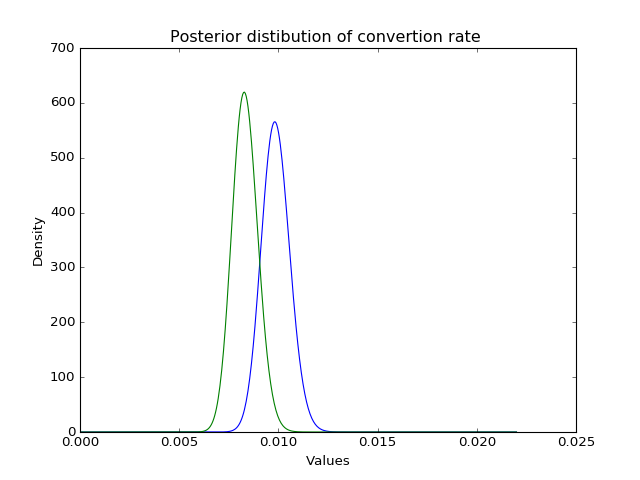

In [7]:
%matplotlib notebook

#abscisse range
x =  np.linspace(0,0.022, 500)

plt.plot(x, posterior_A.pdf(x), label='Posterior of A')
plt.plot(x, posterior_B.pdf(x), label='Posterior of B')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Posterior distibution of convertion rate ');

## Interpretation

In [8]:
A_over_B = (sample_posterior_A > sample_posterior_B).mean()
print("Group A has {0}% chance to overperform group B".format(A_over_B*100))
print("Group B has {0}% chance to overperform group A".format((1-A_over_B)*100))

Group A has 94.895% chance to overperform group B
Group B has 5.105000000000004% chance to overperform group A


In [9]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(sample_posterior_A, sample_posterior_B)
over_0  = (posterior_rel_increase > 0).mean() 
over_05 = (posterior_rel_increase > 0.05).mean()
over_10 = (posterior_rel_increase > 0.1).mean()
over_20 = (posterior_rel_increase > 0.2).mean()


In [10]:
print('Chances that relative increase is over 0 : {0}%'.format(over_0*100))
print('Chances that relative increase is over 0.05 : {0}%'.format(over_05*100))
print('Chances that relative increase is over 0.1 : {0}%'.format(over_10*100))
print('Chances that relative increase is over 0.2 : {0}%'.format(over_20*100))

Chances that relative increase is over 0 : 94.895%
Chances that relative increase is over 0.05 : 87.72%
Chances that relative increase is over 0.1 : 76.21%
Chances that relative increase is over 0.2 : 45.495000000000005%
